<a href="https://colab.research.google.com/github/anaiy2004/COVID-19-Forecasting/blob/main/COVID19_DeathsPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
import csv
import keras
import pandas
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate, BatchNormalization, Conv1D, Conv2D, Flatten, MaxPooling1D
from keras import optimizers
import numpy as np
import tensorflow as tf
import math
from keras.callbacks import EarlyStopping, ModelCheckpoint
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us.csv'
df = pandas.read_csv(url)
inputs = df['cases'].to_numpy()             
outputs = df['deaths'].to_numpy()
days = []
count = 0
for elements in inputs:
  count += 1
  days.append(count)
df['days'] = days

In [29]:
df.head()

,date,cases,deaths,days
0,2020-01-21,1,0,1
1,2020-01-22,1,0,2
2,2020-01-23,1,0,3
3,2020-01-24,2,0,4
4,2020-01-25,3,0,5


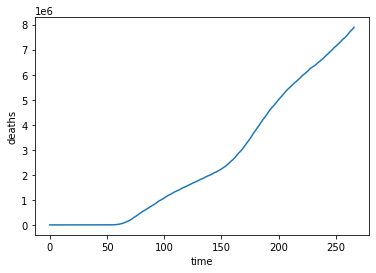

In [30]:
from matplotlib import pyplot as plt
plt.plot(inputs)
plt.ylabel('deaths')
plt.xlabel('time')
plt.show()

In [31]:
past = 5 
s = (len(inputs) , past  * 2)
betterinputs = np.zeros(s)
betteroutputs = np.zeros(len(inputs))

for i in range(len(inputs) - past ): #
  temp = np.zeros(past * 2)
  temp[0 : past] = inputs[i : i+ past]
  temp[past:] = outputs[i : i + past] 
  betterinputs[i] = temp
  betteroutputs[i] = outputs[i+past] #

In [32]:

betterinputs = betterinputs[0:len(df)-past]  #
betteroutputs = betteroutputs[0:len(df)-past] #
days = days[0:len(df) - past]

826.7471264367816


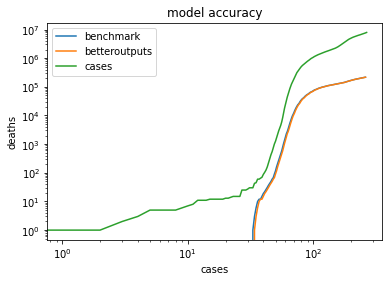

In [33]:
#Creating a benchmark
benchmark = []
for i in range(1, len(betteroutputs)):
   benchmark.append(betteroutputs[i])
sum = 0
for i in range(len(betteroutputs) - 1):
  sum += abs(float(betteroutputs[i]) - float(benchmark[i]))
print(sum / float(len(benchmark)))

plt.semilogy(benchmark, label = "benchmark")
plt.semilogy(betteroutputs , label = "betteroutputs")
plt.semilogx(inputs, label = "cases")
plt.title('model accuracy')
plt.ylabel('deaths')
plt.xlabel('cases')
plt.legend()


In [34]:
split = int(0.8*len(betterinputs))
X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
days = days[split:]
X_train = np.expand_dims(X_train, axis=2)  
X_test = np.expand_dims(X_test, axis=2) 



In [35]:
from sklearn.linear_model import RidgeCV
model = RidgeCV(cv=2)
X_train, X_test, y_train, y_test = betterinputs[:split], betterinputs[split:], betteroutputs[:split], betteroutputs[split:]
model.fit(X_train, y_train)
print("{}".format(np.linalg.norm(model.predict(X_test) - y_test, 1)/len(y_test)))

307.7871556600604


In [36]:
print(days)


[210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262]


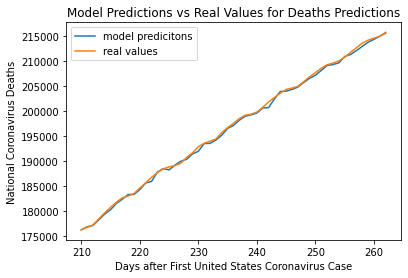

In [37]:
predict = model.predict(X_test)
plt.title("Model Predictions vs Real Values for Deaths Predictions")
plt.plot( days, predict, label = "model predicitons")
plt.plot( days, y_test,  label = "real values")
plt.xlabel("Days after First United States Coronavirus Case")
plt.ylabel("National Coronavirus Deaths")
plt.legend()

In [38]:
from datetime import date
size = (2 , past  * 2)
finalInput = np.zeros(size)
temp = np.zeros(past * 2)
temp[:past] = inputs[-past:]
temp[past:] = outputs[-past:] 
finalInput[0] = temp
finalInput[1] = temp

futurePrediction = model.predict(finalInput)
futurePrediction = futurePrediction[0]
print("Prediction for tomorrow's national coronavirus deaths : " + str(int(futurePrediction)))
print("Today's date : " + str(date.today()))


Prediction for tomorrow's national coronavirus deaths : 216470
Today's date : 2020-10-14


In [39]:
model.score(X_test, y_test)

0.9989441299177934